Hi I'm Prem Saggar.  

A little about me:

DIA

Microsoft

NSA

DARPA

FINRA

Crypto

Twins 

Triplets 

6 Boys

May 27

91,250,000 7,442,000,000 81.55616438

Why should you do well in this class?

QA is important. 

1. QA is a major reason why some companies outperform others
 2. automative
 3. software
 4. healthcare
 5. aviation
 6. where else? 
2. Production outages in IT are unacceptable [9's rule](https://en.wikipedia.org/wiki/High_availability#%22Nines%22)
3. If you develop software for a profession and your code causes a bug there's going to be money/time/lives lost and it might be yours to lose!
4. Challenger Nasa Shuttle https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster#Pre-launch_conditions
4. But why is QA important in Data Science? 




Ok let's have some fun. Here's a question I ask in interviews for FINRA. Can you answer it?

Given:

3,3,4 = 162

2,2,1 = 4

3,3,2 = 18

2,2,2 = 8

3,3,3 = 54

2,2,3 = 16

3,3,1 = 6

What is the pattern?



In [22]:
import pandas as pd

d = {'a': [3,2,3,2,3,2,3], 'b': [3,2,3,2,3,2,3],'c':[4,1,2,2,3,3,1],'d':[162,4,18,8,54,16,6]}
df = pd.DataFrame(data=d)
df.set_index('a')


b  c    d
a           
3  3  4  162
2  2  1    4
3  3  2   18
2  2  2    8
3  3  3   54
2  2  3   16
3  3  1    6

In [24]:
df.sort_values(['a', 'b','c'], ascending=[True, True,True], inplace=True)
df



a  b  c    d
1  2  2  1    4
3  2  2  2    8
5  2  2  3   16
6  3  3  1    6
2  3  3  2   18
4  3  3  3   54
0  3  3  4  162

<IPython.core.display.Javascript object>


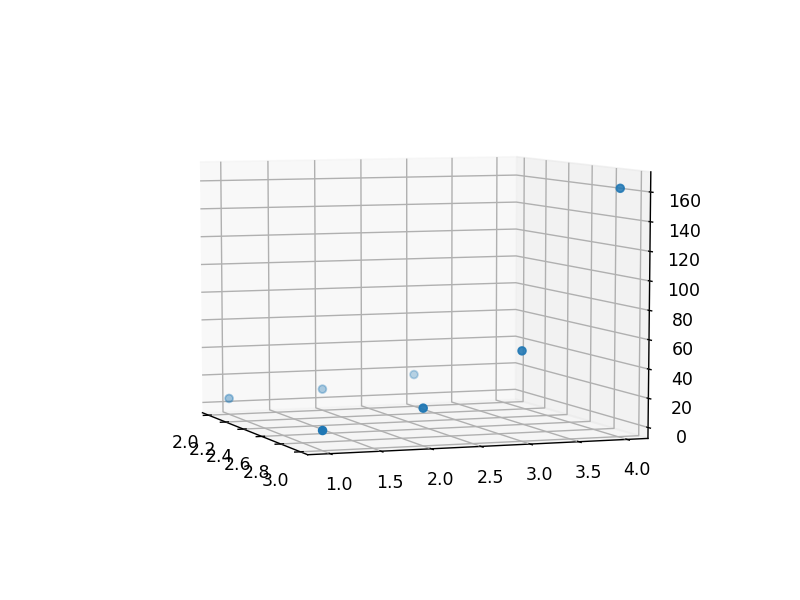

In [25]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.a,df.c, df.d,cmap=plt.hot())
plt.show()


In [4]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [5]:

df.to_sql('data', con=engine)

In [6]:
engine.execute("SELECT * FROM data").fetchall()

[(1, 2, 2, 1, 4),
 (3, 2, 2, 2, 8),
 (5, 2, 2, 3, 16),
 (6, 3, 3, 1, 6),
 (2, 3, 3, 2, 18),
 (4, 3, 3, 3, 54),
 (0, 3, 3, 4, 162)]

In [7]:
#equivalent of pandas sort, really remarkable how easy pandas makes certain things
engine.execute("SELECT * from data d order by d.a asc, d.b asc, d.c asc").fetchall()

[(1, 2, 2, 1, 4),
 (3, 2, 2, 2, 8),
 (5, 2, 2, 3, 16),
 (6, 3, 3, 1, 6),
 (2, 3, 3, 2, 18),
 (4, 3, 3, 3, 54),
 (0, 3, 3, 4, 162)]

Brief intro into Association Rules
If you go to target and buy cocoa-butter lotion, a purse large enough to double as a diaper bag, zinc and magnesium supplements and a bright blue rug there is an 87% chance that ... 

In [8]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [9]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False

In [19]:
from mlxtend.frequent_patterns import apriori

got = apriori(df, min_support=0.6, use_colnames=True)
got

support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Kidney Beans, Eggs)
6       0.6                (Eggs, Onion)
7       0.6         (Kidney Beans, Milk)
8       0.6        (Kidney Beans, Onion)
9       0.6       (Kidney Beans, Yogurt)
10      0.6  (Kidney Beans, Eggs, Onion)

In [20]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(got)
rules

antecedents           consequents  antecedent support  \
0         (Kidney Beans)                (Eggs)                 1.0   
1                 (Eggs)        (Kidney Beans)                 0.8   
2                (Onion)                (Eggs)                 0.6   
3                 (Milk)        (Kidney Beans)                 0.6   
4                (Onion)        (Kidney Beans)                 0.6   
5               (Yogurt)        (Kidney Beans)                 0.6   
6  (Kidney Beans, Onion)                (Eggs)                 0.6   
7          (Onion, Eggs)        (Kidney Beans)                 0.6   
8                (Onion)  (Kidney Beans, Eggs)                 0.6   

   consequent support  support  confidence  lift  leverage  conviction  
0                 0.8      0.8         0.8  1.00      0.00    1.000000  
1                 1.0      0.8         1.0  1.00      0.00         inf  
2                 0.8      0.6         1.0  1.25      0.12         inf  
3                 1.0      0.6         1.0  1.00      0.00         inf  
4                 1.0      0.6         1.0  1.00      0.00         inf  
5                 1.0      0.6         1.0  1.00      0.00         inf  
6                 0.8      0.6         1.0  1.25      0.12         inf  
7                 1.0      0.6         1.0  1.00      0.00         inf  
8                 0.8      0.6         1.0  1.25      0.12         inf

https://en.wikipedia.org/wiki/Association_rule_learning

if we somehow have time fun with 0